# Expresso Churn Prediction Challenge
_This is a notebook by Samson Tontoye._

## Introduction
Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. This notebook looks into using various python-based machine learning and data science libraries in an attempt to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days(to stop purchasing airtime and data from Expresso).

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on monthly income?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

## What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a customer will churn within 90 days using AUC as the evaluation metric.

## **i. Problem Definition**

<a id="problem"></a>

This notebook is a classification machine learning project with an imbalanced class.In this case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we are going to be using a number of different features (pieces of information) to predict if a customer will churn within 90 days.

## ii. Data

The dataset came from Zindi in a formatted way [Zindi](https://zindi.africa/competitions/expresso-churn-prediction/data)

The data describes ~2.5 million expresso clients. Information on the region, revenue,tenure, number of time the customer refilled, top-up amount etc are in the data.

## iii. Evaluation

The evaluation metric is something to define at the start of a project.

Since machine learning is very experimental:

           Since we are working with a highly imbalanced dataset, we will use AUC as an appropriate evaluation metric. If we can get a score of say 0.8 or over across the AUC evaluation metric at predicting whether or not a customer will churn within 90 days from their first transaction during the proof of concept, we'll pursue this project.
           
## iv. Features

Features are different parts of the data. We're going to visualize the relationships between the different features of the data and how it can lead to a customer churning.

One of the most common ways to understand the features is to look at the **data dictionary**. For this project, the data dictionary is in the **Variable Definitions** csv file.

In [391]:
# data manipulation
import numpy as np
import pandas as pd
import scipy

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8

# Standard plotly imports
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization


# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# manage warnings
import warnings
warnings.filterwarnings('ignore')

# for datetime
import datetime as dt
from tqdm.notebook import tqdm_notebook
from collections import Counter

# plot the figure inline
%matplotlib inline

## <a id='1'>1. Data Overview</a>

In [392]:
# Load the data into a pandas dataframe
train = pd.read_csv('Train.csv',
                   low_memory =False)
test = pd.read_csv('Test.csv', 
                   low_memory=False)
submission = pd.read_csv('SampleSubmission.csv',
                low_memory=False)
var_def = pd.read_csv('VariableDefinitions.csv',
                     low_memory=False)

In [393]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(train.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [394]:
dataoverview(train, 'Overview of the training dataset')

Overview of the training dataset:

Rows: 2154048

Number of features: 19

Features:
['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

Missing values: 14380032

Unique values:
user_id           2154048
REGION                 14
TENURE                  8
MONTANT              6540
FREQUENCE_RECH        123
REVENUE             38114
ARPU_SEGMENT        16535
FREQUENCE              91
DATA_VOLUME         41550
ON_NET               9884
ORANGE               3167
TIGO                 1315
ZONE1                 612
ZONE2                 486
MRG                     1
REGULARITY             62
TOP_PACK              140
FREQ_TOP_PACK         245
CHURN                   2
dtype: int64


In [395]:
dataoverview(test, 'Overview of the test dataset')

Overview of the test dataset:

Rows: 380127

Number of features: 18

Features:
['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

Missing values: 2531617

Unique values:
user_id           380127
REGION                14
TENURE                 8
MONTANT             2431
FREQUENCE_RECH       115
REVENUE            23276
ARPU_SEGMENT       10894
FREQUENCE             91
DATA_VOLUME        21636
ON_NET              5914
ORANGE              2053
TIGO                 801
ZONE1                322
ZONE2                263
MRG                    1
REGULARITY            62
TOP_PACK             102
FREQ_TOP_PACK        174
dtype: int64


## <a id='2'>2. Exploratory Data Analysis</a>

**Cleaning**: To clean our data, we'll need to work with:

* **Missing values**: Either omit elements from a dataset that contain missing values or impute them (fill them in).
* **Special values**: Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN. Calculations involving special values often result in special values, and need to be handled/cleaned.
* **Outliers**: They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision.
* **Obvious inconsistencies**: A person's age cannot be negative. Find the inconsistencies and plan for them.

When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:

* Nominal: is for mutual exclusive, but not ordered, categories.
* Ordinal: is one where the order matters but not the difference between values.
* Interval: is a measurement where the difference between two values is meaningful.
* Ratio: has all the properties of an interval variable, and also has a clear definition of 0.0.

There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

* Numerical: any feature that contains numeric values.
* Categorical: any feature that contains categories, or text.

Based on the problem on the hand, we will use AUC score which is the evaluation metric indicated by [Zindi](https://zindi.africa/competitions/expresso-churn-prediction)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [396]:
# top 5 rows of the dataframe
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [397]:
train.shape

(2154048, 19)

In [398]:
# top 5 rows of the test dataset
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [399]:
test.shape

(380127, 18)

In [400]:
# check the variable definition
var_def

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [401]:
# let's see how many positive(1) and negatives(0) we have in the dataframe
print('Length of the training dataset:', len(train))
print('Length of the test dataset:', len(test))
print('Total number of customers that will not churn in the first 90 days:', len(train[train['CHURN']==0]))
print('Total number of customers that will churn in the first 90 days:', len(train[train["CHURN"]==1]))

Length of the training dataset: 2154048
Length of the test dataset: 380127
Total number of customers that will not churn in the first 90 days: 1750062
Total number of customers that will churn in the first 90 days: 403986


Since these two values(Customers that will churn within the first 3 months and customers that will not churn in the first 3 months) are not close, our target column can be considered **imbalanced**. An **imbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. From our churn column, if the customer will churn in the first 3 months, it is denoted with 1, if the customer will not claim insurance in the first 3 months, it is denoted as 0.

* The target that we will use to guide the exploration is **CHURN**

### <a id='2.1'>2.1. Customer Churn in Data</a>

In [402]:
# To see the values in percentages
train['CHURN'].value_counts(normalize=True)

0    0.812453
1    0.187547
Name: CHURN, dtype: float64

In [403]:
trace = go.Pie(labels = train['CHURN'].value_counts().keys().tolist(),
               values = train['CHURN'].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue', 'lime'],
                             line = dict(color = 'white', width = 1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer Churn in Training Data",
                        plot_bgcolor = "rgb(243, 243, 243)",
                        paper_bgcolor = "rgb(243, 243, 243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

The proportion of customer that will not churn in the first 3 months to those that will churn in the first 3 months is 4.3:1. 1 in 4 customers will churn in the first 3 months.

In [404]:
# Check the shape of the train and test dataset
print(f'The shape of the train dataset is: {train.shape}\nThe shape of the test dataset is: {test.shape}')

The shape of the train dataset is: (2154048, 19)
The shape of the test dataset is: (380127, 18)


In [405]:
# check the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [406]:
# check for missing values in the train dataset
train.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [407]:
# The .describe() function will demonstrate the count, mean, std dev, min, max, etc values for the 
# Numerical features present in the  train dataset.
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,1397309.0,5532.116998,7111.339421,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,1397309.0,11.529120,13.274070,1.0,2.0,7.0,16.0,133.0
REVENUE,1428000.0,5510.810334,7187.112880,1.0,1000.0,3000.0,7368.0,532177.0
ARPU_SEGMENT,1428000.0,1836.942894,2395.699954,0.0,333.0,1000.0,2456.0,177392.0
FREQUENCE,1428000.0,13.978141,14.694035,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,1093615.0,3366.450167,13304.463667,0.0,0.0,257.0,2895.0,1823866.0
ON_NET,1367373.0,277.689140,872.688909,0.0,5.0,27.0,156.0,50809.0
ORANGE,1258800.0,95.418711,204.987266,0.0,7.0,29.0,99.0,21323.0
TIGO,864032.0,23.109253,63.578086,0.0,2.0,6.0,20.0,4174.0
ZONE1,169721.0,8.170132,41.169511,0.0,0.0,1.0,3.0,4792.0


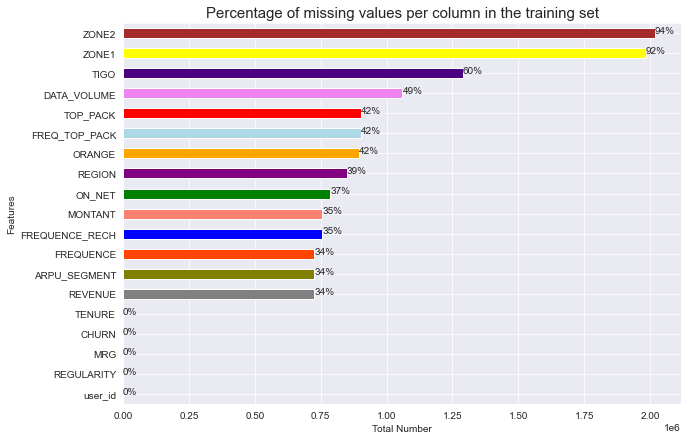

In [408]:
# Visualizing the missing values in the training dataset
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7),
                                          color=['indigo', 'yellow', 'brown', 'pink',
                                                 'cyan', 'gray', 'olive', 'orangered',
                                                 'blue', 'salmon', 'green', 'purple',
                                                 'orange', 'lightblue', 'red', 'violet'])

# Add some attributes
plt.title('Percentage of missing values per column in the training set', fontdict={'size':15})
plt.xlabel('Total Number')
plt.ylabel('Features')

for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/train.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y =p.get_y() + height/2
    ax.annotate(percentage, (x,y));

In [409]:
# Check the information of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [410]:
# The .describe() function will demonstrate the count, mean, std dev, min, max, etc values for the 
# Numerical features present in the test dataset
test.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,247072.0,5524.958826,7116.320922,25.0,1000.0,3000.0,7350.0,201500.0
FREQUENCE_RECH,247072.0,11.519853,13.242743,1.0,2.0,7.0,16.0,146.0
REVENUE,252754.0,5499.680468,7195.093138,1.0,1000.0,3000.0,7351.0,200965.0
ARPU_SEGMENT,252754.0,1833.232443,2398.360570,0.0,333.0,1000.0,2450.0,66988.0
FREQUENCE,252754.0,13.957963,14.652660,1.0,3.0,9.0,19.0,91.0
DATA_VOLUME,193087.0,3346.095454,12002.653047,0.0,0.0,259.0,2884.0,977796.0
ON_NET,241613.0,278.806310,874.253933,0.0,5.0,27.0,157.0,26786.0
ORANGE,222897.0,95.193008,203.950776,0.0,7.0,29.0,99.0,6345.0
TIGO,153126.0,23.052088,65.042688,0.0,2.0,6.0,20.0,3708.0
ZONE1,29861.0,8.164663,48.857605,0.0,0.0,1.0,3.0,4215.0


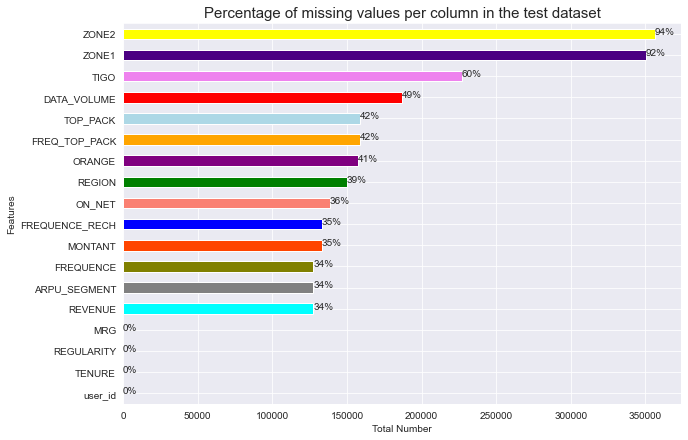

In [411]:
# Visualizing the missing values in the test dataset
ax = test.isna().sum().sort_values().plot(kind='barh', figsize = (10, 7),
                                          color = ['indigo', 'yellow', 'brown', 'pink',
                                                 'cyan', 'gray', 'olive', 'orangered',
                                                 'blue', 'salmon', 'green', 'purple',
                                                 'orange', 'lightblue', 'red', 'violet'])
# Add some attributes
plt.title('Percentage of missing values per column in the test dataset', fontdict={'size': 15})
plt.xlabel('Total Number')
plt.ylabel('Features')

for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/test.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() +  height/2
    ax.annotate(percentage, (x, y));

### <a id='2.2'>2.2. Variable Distributions</a>

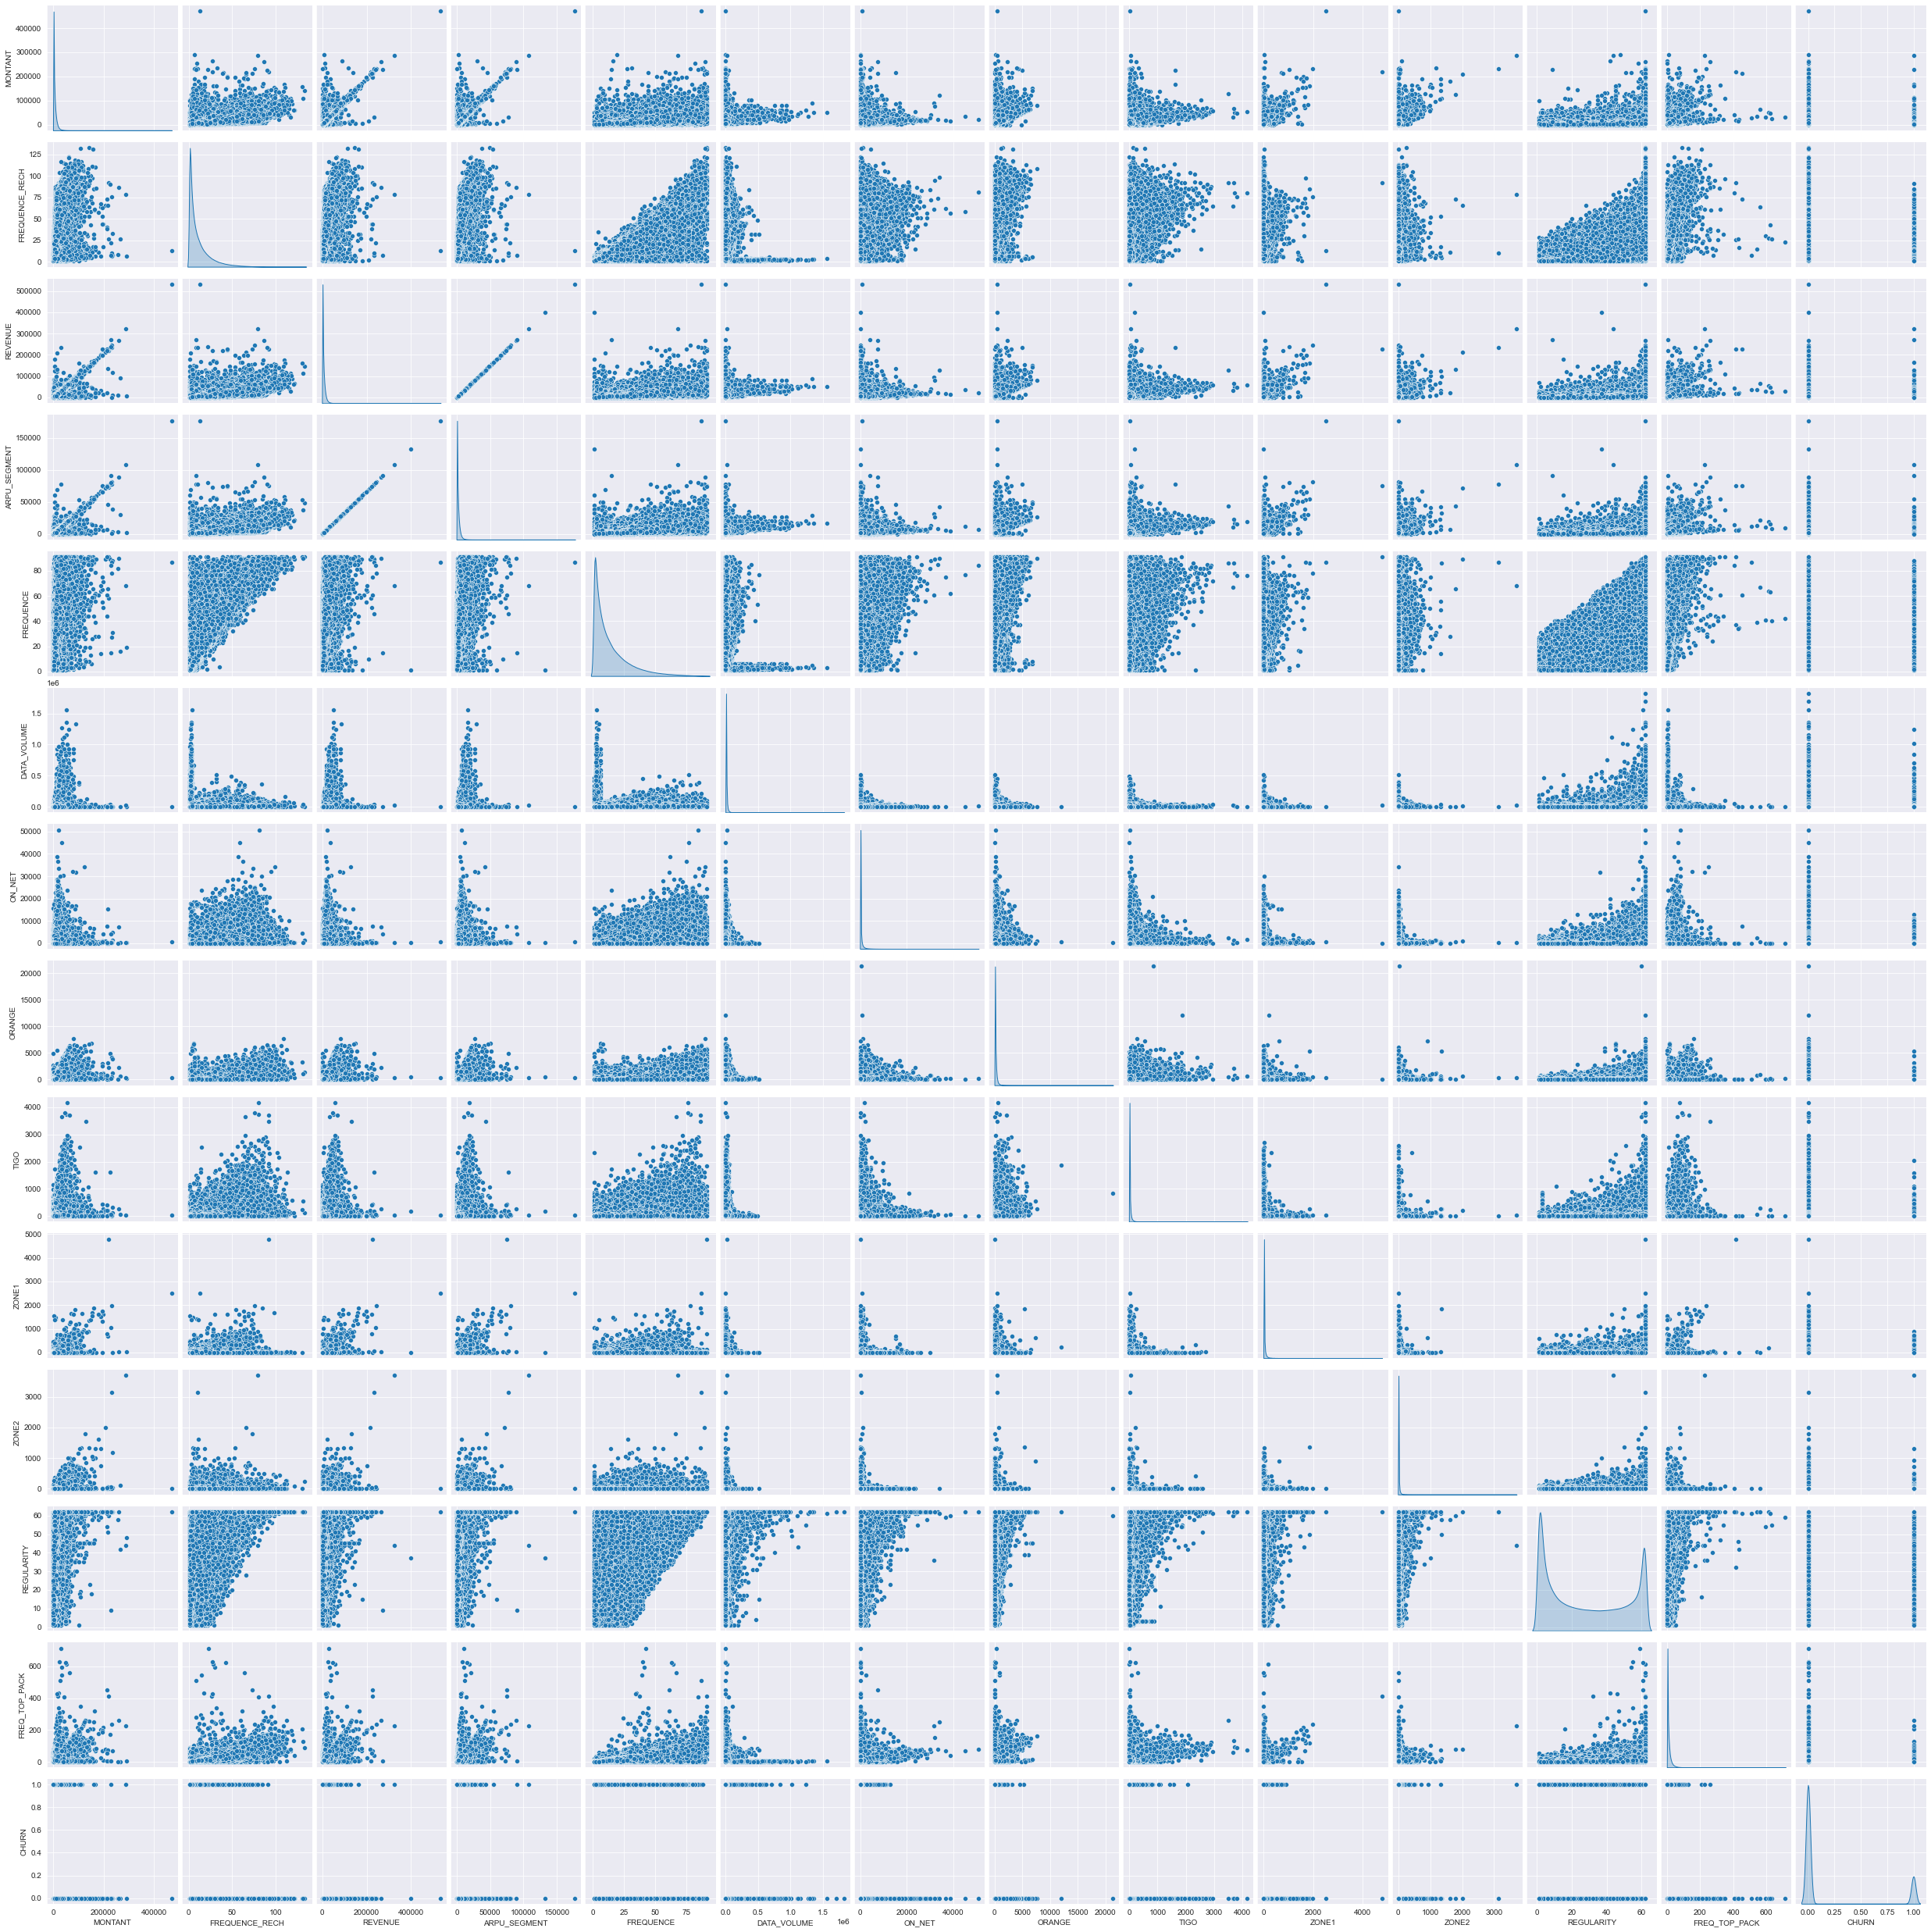

In [412]:
#Seperating columns to be visualized
out_cols = list(set(train.nunique()[train.nunique()<6].keys().tolist()
                    + train.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in train.columns if x not in out_cols] + ['CHURN']

sns.pairplot(train[viz_cols], diag_kind='kde')
plt.show()

### <a id='2.3'>2.3. Numerical Variables</a>

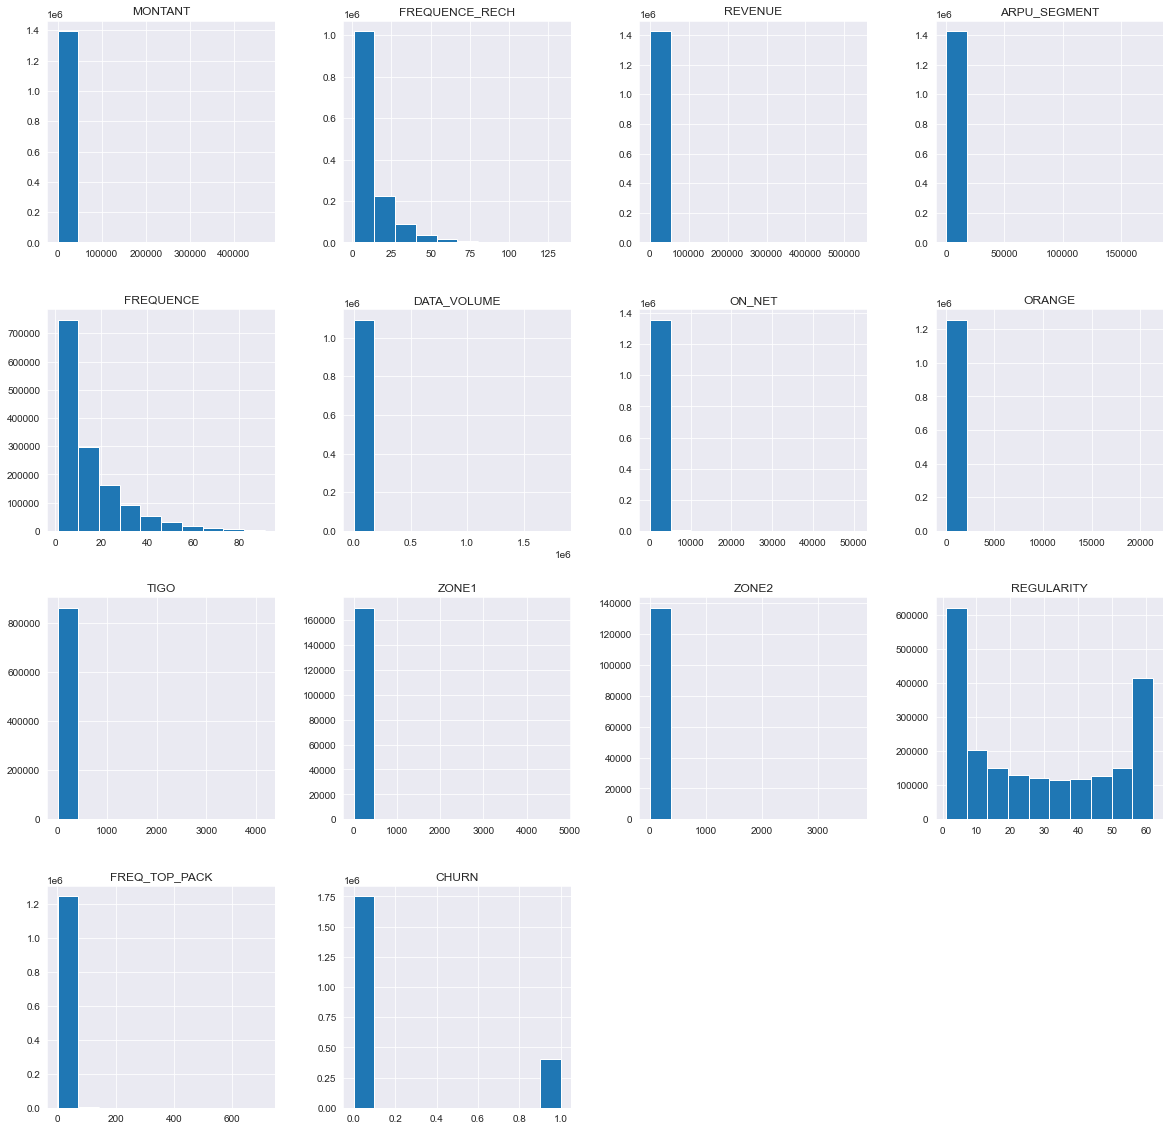

In [413]:
train.hist(figsize=(20,20))
plt.show()

> A few observations can be made based on the information and histograms for numerical features:

 - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. FREQUENCE, FREQUENCE_RECH). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
 - MONTANT, REVENUE, ARPU_SEGMENT, DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2, and FREQ_TOP_PACK are constant values for all customers. They're likely to be redundant features.

### <a id='2.4'>2.4. Categorical Variables</a>

#### REGION (The location of each client)

In [414]:
# Check the number of Regions
train.REGION.value_counts()

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64

In [415]:
# Drop cases where either variable is missing
data = train[['REGION', 'CHURN']].dropna() 
pd.crosstab(data.REGION, data.CHURN)

CHURN,0,1
REGION,,
DAKAR,503398,9873
DIOURBEL,65031,1880
FATICK,35137,506
KAFFRINE,43647,316
KAOLACK,94713,2273
KEDOUGOU,977,43
KOLDA,38326,417
LOUGA,97473,1580
MATAM,28499,584


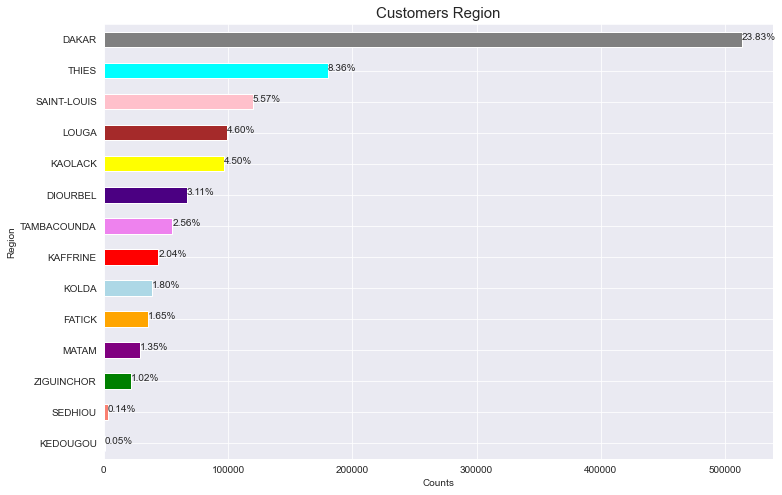

In [416]:
# Check how many regions are in the region feature
ax = train.REGION.value_counts().sort_values().plot(kind='barh', figsize=(12, 8),
                                                      color=['blue', 'salmon', 'green', 'purple',
                                                                  'orange','lightblue', 'red', 'violet',
                                                                  'indigo', 'yellow', 'brown', 'pink',
                                                                  'cyan', 'gray', 'olive', 'orangered'])

# Add some attributes
plt.title('Customers Region', fontdict={'size': 15})
plt.xlabel('Counts')
plt.ylabel('Region')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));  

#### TENURE (Duration in the network)

In [417]:
pd.crosstab(train.TENURE, train.CHURN)

CHURN,0,1
TENURE,,
D 3-6 month,651,119
E 6-9 month,1523,316
F 9-12 month,7088,2240
G 12-15 month,10188,4713
H 15-18 month,19082,6924
I 18-21 month,32931,12347
J 21-24 month,9787,2938
K > 24 month,1668812,374389


In [418]:
# Check the cellphone duration
print(train['TENURE'].value_counts(normalize=True))

K > 24 month     0.948540
I 18-21 month    0.021020
H 15-18 month    0.012073
G 12-15 month    0.006918
J 21-24 month    0.005907
F 9-12 month     0.004330
E 6-9 month      0.000854
D 3-6 month      0.000357
Name: TENURE, dtype: float64


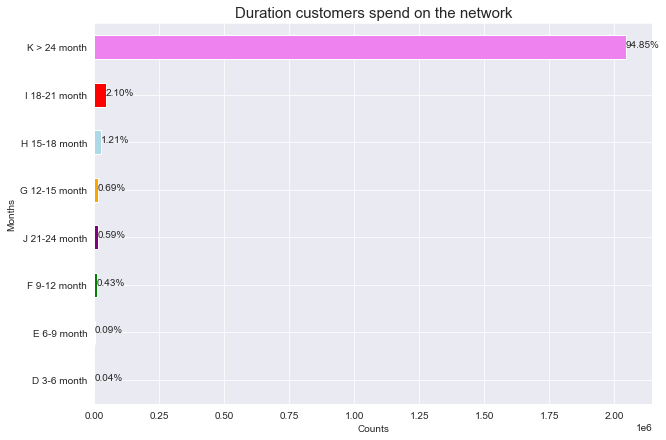

In [419]:
# Check the cellphone duration in a horizontal barchart
ax = train.TENURE.value_counts().sort_values().plot(kind='barh', figsize=(10, 7),
                                                      color=['blue', 'salmon', 'green', 'purple',
                                                                  'orange','lightblue', 'red', 'violet',
                                                                  'indigo', 'yellow', 'brown', 'pink',
                                                                  'cyan', 'gray', 'olive', 'orangered'])

# Add some attributes
plt.title('Duration customers spend on the network', fontdict={'size': 15})
plt.xlabel('Counts')
plt.ylabel('Months')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));  

#### MRG (A client who is going)

In [420]:
print(train['MRG'].value_counts())

NO    2154048
Name: MRG, dtype: int64


In [421]:
pd.crosstab(train.MRG, train.CHURN)

CHURN,0,1
MRG,,
NO,1750062,403986


Text(0.5, 0, 'MRG')

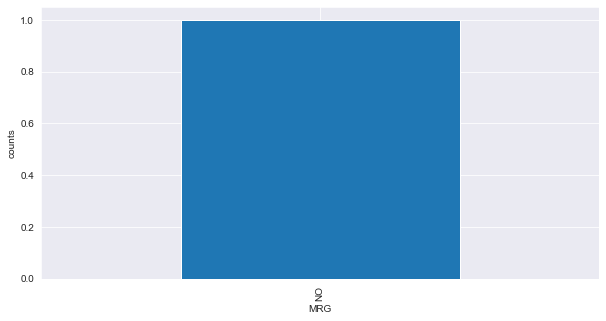

In [422]:
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

#### TOP_PACK (THE MOST ACTIVE PACKS)

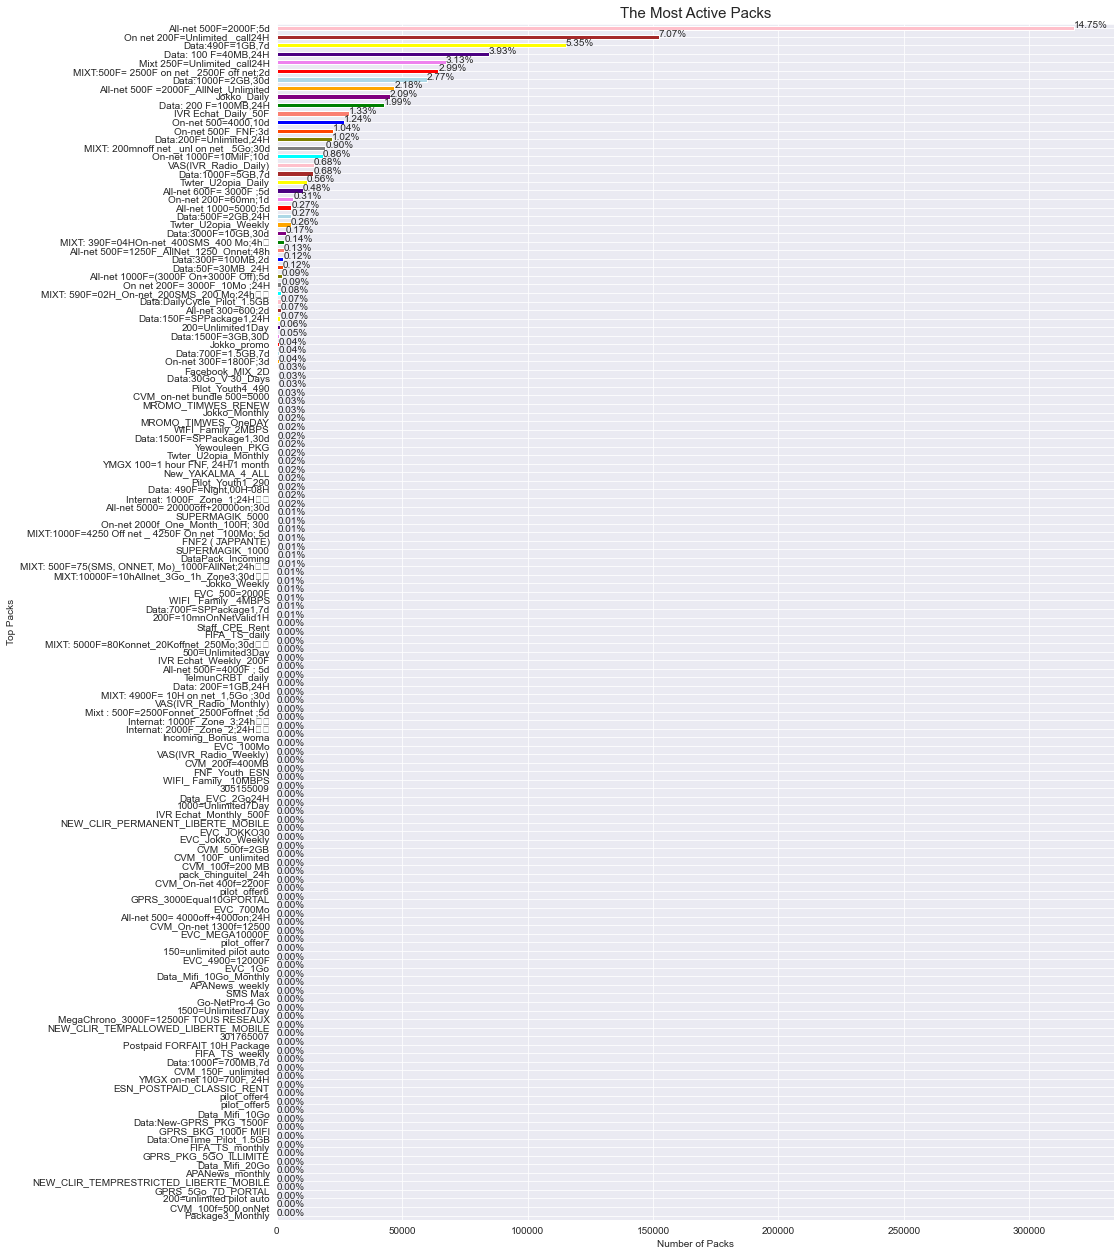

In [423]:
ax = train.TOP_PACK.value_counts().sort_values().plot(kind='barh', figsize=(15, 22),
                                                      color=['blue', 'salmon', 'green', 'purple',
                                                                  'orange','lightblue', 'red', 'violet',
                                                                  'indigo', 'yellow', 'brown', 'pink',
                                                                  'cyan', 'gray', 'olive', 'orangered'])

# Add some attributes
plt.title('The Most Active Packs', fontdict={'size': 15})
plt.xlabel('Number of Packs')
plt.ylabel('Top Packs')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));  

#### CHURN

In [424]:
# Check the proportion of classes in the churn column
train['CHURN'].value_counts(normalize=True)

0    0.812453
1    0.187547
Name: CHURN, dtype: float64

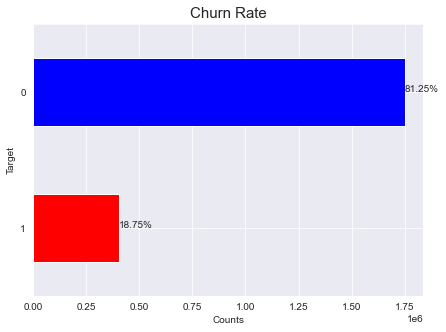

In [425]:
#Check if the predictor class is balanced 
ax = train.CHURN.value_counts().sort_values().plot(kind='barh', figsize=(7, 5),
                                                      color=['red', 'blue'])

# Add some attributes
plt.title('Churn Rate', fontdict={'size': 15})
plt.xlabel('Counts')
plt.ylabel('Target')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/train.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));  

0= Will not churn in 90 days, 1= Will churn in 90 days

### <a id='3'>3. Feature Engineering</a>

**Engineering**: There are multiple techniques for feature engineering:

* **Decompose**: Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.

**Imputation**: We can impute missing values in a number of different ways:

* **Hot-Deck**: The technique then finds the first missing value and uses the cell value immediately prior to the data that are missing to impute the missing value.
* **Cold-Deck**: Selects donors from another dataset to complete missing data.
* **Median-substitution**: Another imputation technique involves replacing any missing value with the median of that variable for all other cases, which has the benefit of not changing the sample median for that variable.
* **Regression**: A regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where that variable is missing.

In [426]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [427]:
# Replacing the K > and months in the training dataset with an empty string
train['TENURE'] = train['TENURE'].str.replace('A >', '')
train['TENURE'] = train['TENURE'].str.replace('B >', '')
train['TENURE'] = train['TENURE'].str.replace('C >', '')
train['TENURE'] = train['TENURE'].str.replace('D >', '')
train['TENURE'] = train['TENURE'].str.replace('E >', '')
train['TENURE'] = train['TENURE'].str.replace('F >', '')
train['TENURE'] = train['TENURE'].str.replace('G >', '')
train['TENURE'] = train['TENURE'].str.replace('H >', '')
train['TENURE'] = train['TENURE'].str.replace('I >', '')
train['TENURE'] = train['TENURE'].str.replace('J >', '')
train['TENURE'] = train['TENURE'].str.replace('K >', '')
train['TENURE'] = train['TENURE'].str.replace('L >', '')
train['TENURE'] = train['TENURE'].str.replace('M >', '')
train['TENURE'] = train['TENURE'].str.replace('N >', '')
train['TENURE'] = train['TENURE'].str.replace('O >', '')
train['TENURE'] = train['TENURE'].str.replace('P >', '')
train['TENURE'] = train['TENURE'].str.replace('Q >', '')
train['TENURE'] = train['TENURE'].str.replace('R >', '')
train['TENURE'] = train['TENURE'].str.replace('S >', '')
train['TENURE'] = train['TENURE'].str.replace('T >', '')
train['TENURE'] = train['TENURE'].str.replace('U >', '')
train['TENURE'] = train['TENURE'].str.replace('V >', '')
train['TENURE'] = train['TENURE'].str.replace('W >', '')
train['TENURE'] = train['TENURE'].str.replace('X >', '')
train['TENURE'] = train['TENURE'].str.replace('Y >', '')
train['TENURE'] = train['TENURE'].str.replace('Z >', '')
train['TENURE'] = train['TENURE'].str.replace('month', '')

In [428]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,24,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,24,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,24,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,24,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [429]:
train['TENURE'] = train['TENURE'].str.replace('A ', '')
train['TENURE'] = train['TENURE'].str.replace('B ', '')
train['TENURE'] = train['TENURE'].str.replace('C ', '')
train['TENURE'] = train['TENURE'].str.replace('D ', '')
train['TENURE'] = train['TENURE'].str.replace('E ', '')
train['TENURE'] = train['TENURE'].str.replace('F ', '')
train['TENURE'] = train['TENURE'].str.replace('G ', '')
train['TENURE'] = train['TENURE'].str.replace('H ', '')
train['TENURE'] = train['TENURE'].str.replace('I ', '')
train['TENURE'] = train['TENURE'].str.replace('J ', '')
train['TENURE'] = train['TENURE'].str.replace('K ', '')
train['TENURE'] = train['TENURE'].str.replace('L ', '')
train['TENURE'] = train['TENURE'].str.replace('M ', '')
train['TENURE'] = train['TENURE'].str.replace('N ', '')
train['TENURE'] = train['TENURE'].str.replace('O ', '')
train['TENURE'] = train['TENURE'].str.replace('P ', '')
train['TENURE'] = train['TENURE'].str.replace('Q ', '')
train['TENURE'] = train['TENURE'].str.replace('R ', '')
train['TENURE'] = train['TENURE'].str.replace('S ', '')
train['TENURE'] = train['TENURE'].str.replace('T ', '')
train['TENURE'] = train['TENURE'].str.replace('U ', '')
train['TENURE'] = train['TENURE'].str.replace('V ', '')
train['TENURE'] = train['TENURE'].str.replace('W ', '')
train['TENURE'] = train['TENURE'].str.replace('X ', '')
train['TENURE'] = train['TENURE'].str.replace('Y ', '')
train['TENURE'] = train['TENURE'].str.replace('Z ', '')

In [430]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,24,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,18-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,24,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,24,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,24,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


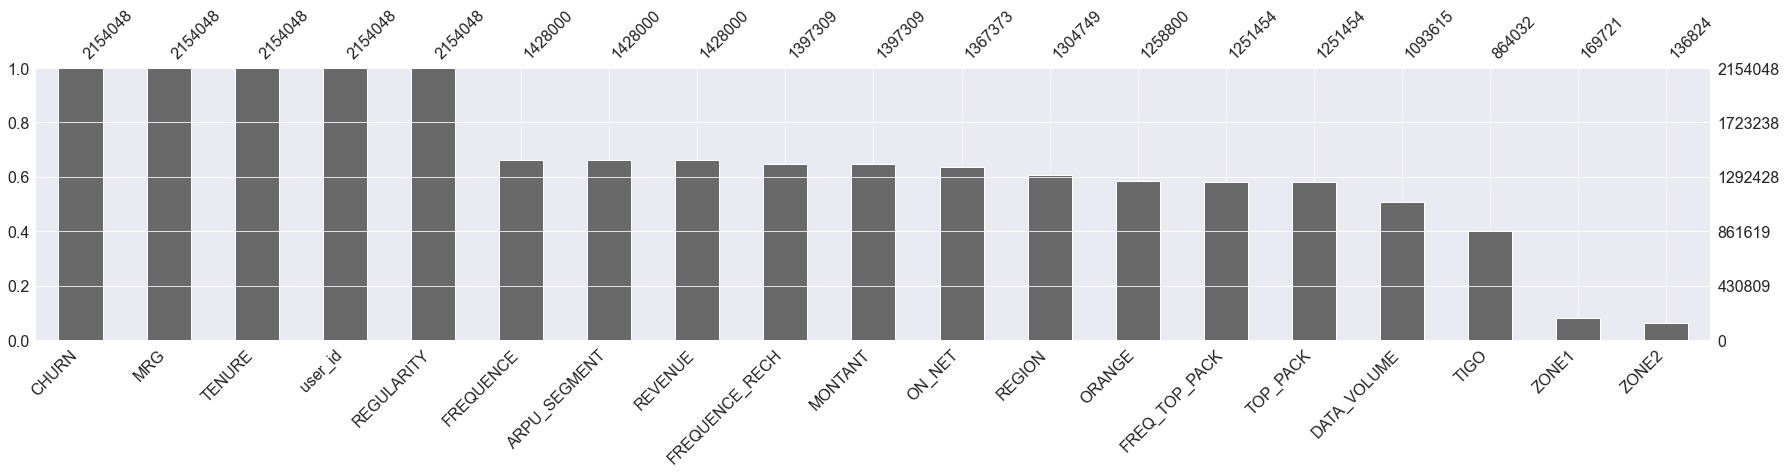

In [431]:
# Visualize the missing values in descending order
missingno.bar(train, sort='descending', figsize=(30, 5));

In [432]:
# Replacing the letters and month in the test dataset with an empty string
test['TENURE'] = test['TENURE'].str.replace('A >', '')
test['TENURE'] = test['TENURE'].str.replace('B >', '')
test['TENURE'] = test['TENURE'].str.replace('C >', '')
test['TENURE'] = test['TENURE'].str.replace('D >', '')
test['TENURE'] = test['TENURE'].str.replace('E >', '')
test['TENURE'] = test['TENURE'].str.replace('F >', '')
test['TENURE'] = test['TENURE'].str.replace('G >', '')
test['TENURE'] = test['TENURE'].str.replace('H >', '')
test['TENURE'] = test['TENURE'].str.replace('I >', '')
test['TENURE'] = test['TENURE'].str.replace('J >', '')
test['TENURE'] = test['TENURE'].str.replace('K >', '')
test['TENURE'] = test['TENURE'].str.replace('L >', '')
test['TENURE'] = test['TENURE'].str.replace('M >', '')
test['TENURE'] = test['TENURE'].str.replace('N >', '')
test['TENURE'] = test['TENURE'].str.replace('O >', '')
test['TENURE'] = test['TENURE'].str.replace('P >', '')
test['TENURE'] = test['TENURE'].str.replace('Q >', '')
test['TENURE'] = test['TENURE'].str.replace('R >', '')
test['TENURE'] = test['TENURE'].str.replace('S >', '')
test['TENURE'] = test['TENURE'].str.replace('T >', '')
test['TENURE'] = test['TENURE'].str.replace('U >', '')
test['TENURE'] = test['TENURE'].str.replace('V >', '')
test['TENURE'] = test['TENURE'].str.replace('W >', '')
test['TENURE'] = test['TENURE'].str.replace('X >', '')
test['TENURE'] = test['TENURE'].str.replace('Y >', '')
test['TENURE'] = test['TENURE'].str.replace('Z >', '')
test['TENURE'] = test['TENURE'].str.replace('month', '')

In [433]:
# Replacing the letters and month in the test dataset with an empty string
test['TENURE'] = test['TENURE'].str.replace('A ', '')
test['TENURE'] = test['TENURE'].str.replace('B ', '')
test['TENURE'] = test['TENURE'].str.replace('C ', '')
test['TENURE'] = test['TENURE'].str.replace('D ', '')
test['TENURE'] = test['TENURE'].str.replace('E ', '')
test['TENURE'] = test['TENURE'].str.replace('F ', '')
test['TENURE'] = test['TENURE'].str.replace('G ', '')
test['TENURE'] = test['TENURE'].str.replace('H ', '')
test['TENURE'] = test['TENURE'].str.replace('I ', '')
test['TENURE'] = test['TENURE'].str.replace('J ', '')
test['TENURE'] = test['TENURE'].str.replace('K ', '')
test['TENURE'] = test['TENURE'].str.replace('L ', '')
test['TENURE'] = test['TENURE'].str.replace('M ', '')
test['TENURE'] = test['TENURE'].str.replace('N ', '')
test['TENURE'] = test['TENURE'].str.replace('O ', '')
test['TENURE'] = test['TENURE'].str.replace('P ', '')
test['TENURE'] = test['TENURE'].str.replace('Q ', '')
test['TENURE'] = test['TENURE'].str.replace('R ', '')
test['TENURE'] = test['TENURE'].str.replace('S ', '')
test['TENURE'] = test['TENURE'].str.replace('T ', '')
test['TENURE'] = test['TENURE'].str.replace('U ', '')
test['TENURE'] = test['TENURE'].str.replace('V ', '')
test['TENURE'] = test['TENURE'].str.replace('W ', '')
test['TENURE'] = test['TENURE'].str.replace('X ', '')
test['TENURE'] = test['TENURE'].str.replace('Y ', '')
test['TENURE'] = test['TENURE'].str.replace('Z ', '')

In [434]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,24,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,18-21,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,24,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


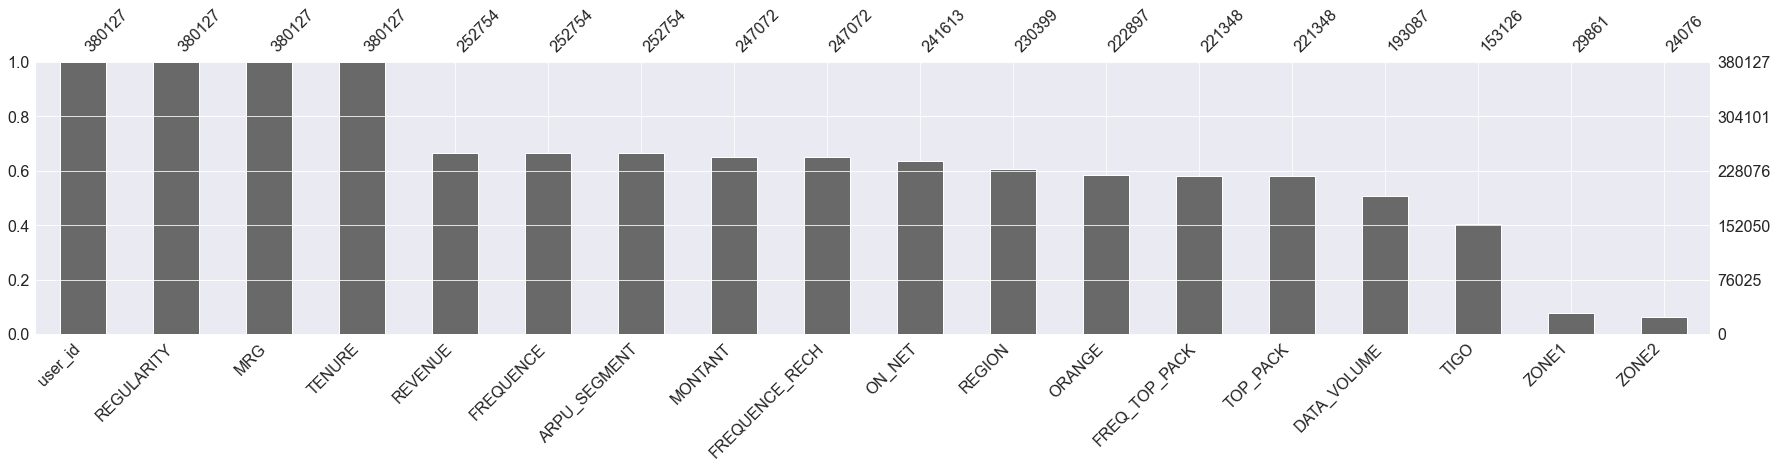

In [435]:
# Visualize the missing values in descending order
missingno.bar(test, sort='descending', figsize=(30, 5));

In [436]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


### Filling the numerical columns of the training data with the median

In [437]:
# Check columns that are numeric datatype
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

MONTANT
FREQUENCE_RECH
REVENUE
ARPU_SEGMENT
FREQUENCE
DATA_VOLUME
ON_NET
ORANGE
TIGO
ZONE1
ZONE2
REGULARITY
FREQ_TOP_PACK
CHURN


In [438]:
# Check columns that are not numeric datatype
for label, content in train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

user_id
REGION
TENURE
MRG
TOP_PACK


In [439]:
train.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [440]:
test.isna().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [441]:
pd.Categorical(train['TENURE']).codes

array([0, 3, 0, ..., 0, 0, 0], dtype=int8)

In [442]:
# Check for which numeric columns have null(missing) values
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MONTANT
FREQUENCE_RECH
REVENUE
ARPU_SEGMENT
FREQUENCE
DATA_VOLUME
ON_NET
ORANGE
TIGO
ZONE1
ZONE2
FREQ_TOP_PACK


In [443]:
# fill the numeric rows with the median because the median is more robust to outliers than the mean
for label, content in train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
         # Fill the missing numeric values with the median   
            train[label] = content.fillna(content.median())  

In [444]:
train.isna().sum()

user_id                0
REGION            849299
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK          902594
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64